In [38]:
from IPython.core.display import display, HTML, Image
def PDF(url):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % url)

# Intro 

On imagine qu’on veut présenter une feuille à une caméra, sur laquelle vous on écrit un chiffre. On aimerait que l’algorithme derrière la caméra soit capable de déterminer, avec précision, le chiffre qu’on a écrit.  

Ce problème peut paraitre simple à traiter, mais il en va différemment pour un ordinateur. Nous allons donc tenter, non pas de lui faire résoudre le problème « quel est ce chiffre ? », mais plutôt de lui faire résoudre « Comment apprendre à reconnaitre un chiffre ? ».  

Prenons une image de 28×28 pixels, à savoir le format standard pour le challenge MNIST (Modified National Institute of Standards and Technology) de reconnaissance des chiffres. Cette image est fournie en noir et blanc, avec comme seule inscription un chiffre.

Pour représenter cette image, nous allons utiliser un vecteur binaire de 784 variables (28×28). La ième valeur du vecteur prendra la valeur 0 ou 1 suivant si le ième pixel dans l’image est blanc ou noir.  

Un algorithme de Deep Learning va commencer par subdiviser ce problème complexe, en sous problèmes plus simple à résoudre. Pour cela, il va prendre des sous parties de l’image, par exemple, des groupements de pixels de 5×5, 4×4, ou 3×3, et opérer une fonction afin d’extraire des motifs dans cette sous-partie (on parle d’opération de convolution).  

Ces fonctions permettent de faire ressortir certaines caractéristiques des images.
Ainsi, différentes transformations sont opérées sur différentes parties de l’image d’entrée, retravaillées puis combinées à la couche suivante, etc. permettant ainsi de générer des cartographies des pixels importants dans l’image.


## Les données
Les données sont séparées en 2 sous-parties : 
- 60 000 images pour la base train
- 10 000 images pour la base test  

On note que 250 personnes différentes, et de background variés constituent la base train. Les 250 personnes de la base test sont encore des personnes encore une fois différentes mais appartenant aux mêmes catégories.


# Chap 1

In [39]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap1_html.pdf")

# Chap 2

In [40]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap2_html.pdf")

Précédemment nous avons évoqué comment les réseaux de neurones pouvaient apprendre les poids et les biais en utilisant l’algorithme de la descente du gradient. Pour pouvoir calculer la fonction du coût nous avons recours à un algorithme rapide sous le nom de retro propagation.  

Quand on parle de perceptron, ou perceptron multicouche, l’accent est mis sur l’algorithme d’apprentissage sur ces deux modèles, en particulier sur l’algorithme de rétro propagation (back propagation en anglais). Cet algorithme est, en effet, le premier algorithme d'apprentissage convaincant dans un modèle suffisamment puissant et cet algorithme à de nombreuses applications.

## Objectif

Cette partie du réseau de neurones est souvent traitée comme boite noire, dont certains sont prêts à omettre les détails. Au cœur de la retro propagation et la dérivée ∂C/∂w de la fonction du coût C par rapport au poids w ou au biais b dans le réseau.  

Cette fonction du coût mesure l’écart entre les prédictions des neurones de sorties et les valeurs cibles spécifiés dans l’ensemble d’entraînement. On cherche à minimiser la somme ou la moyenne des erreurs sur toutes les configurations de l’ensemble d’entrainement.  
L’expression détermine à quelle vitesse le coût peut varier quand on change les poids et les biais. Donc cet algorithme nous permet de juger comment les poids et biais d’un réseau peuvent affecter don comportement.

## Faiblesses 

1.	L’expérience montre que le temps d’entraînement d’un réseau de neurone croît rapidement lorsque le nombre de couches augmente. C’est d’ailleurs l’une des raisons pour lesquelles à les réseaux de neurones ont été remisés au profit d’autres algorithmes non-linéaires moins gourmand en ressources comme les SVM.  

2.	Les réseaux de neurones n’échappent pas au problème central du Machine Learning : l’overfitting.

## Fonctionnement de l’algorithme

D’une manière générale, le but est de calculer les dérivés partiels ∂C/∂w et ∂C/∂b de la fonction du coût C par rapport à n’importe quel poids w ou biais b dans le réseau.
- Entrée :
- Feedforward
- Erreur de sortie
- Retro propagation de l’erreur
- Sortie
One remarque que le mouvement à reculons est une conséquence du fait que le coût est une fonction de sorties du réseau. 

Dans la class Network nous avons deux méthodes :
- update_mini_batch : met à jour les poids et biais en calculant le gradient pour le mini_batch courrant. Ce dernier est une liste de tuples avec un taux d’apprentissage

- backprop : calcule les dérivées partielles décrites précédemment; Cette méthode retourne un tuple qui représente le gradient pour la fonction du coût. A noter que nabla_b et nabla_w sont des couche-par-couche listes de matrices numpy.

Les étapes décrites précédemment se succèdent également et logiquement dans l’algorithme. 

L’idée novatrice de l’algorithme de rétro propagation est qu’elle nous permet de calculer simultanément toutes les dérivés partiels en utilisant un pass à travers le réseau suivis par une pass en arrière.  

La question qu’on se pose souvent : Qu’est-ce que l’algorithme fait réellement ? On peut dire que l’erreur est retro-propagée  de la sortie. Mais peut-on être sûr et éventuellement déduire ce qu’ils se passent quand nous faisons les multiplications de vecteurs et matrices ?

# Chap 3 

In [41]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap3_html.pdf")

# Chap 6 

In [42]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap6_html.pdf")

Dans cette partie nous résumerons le réseau de neurones convolutifs, par le biais de la résolution du problème de classification des chiffres manuscrits à partir de l’ensemble de donnée de MNIST.

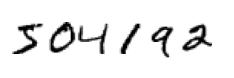

In [43]:
Image(filename='./img/numbers1.png') 

Elle contient 60000 exemples d’apprentissage et 10000 exemples de test de taille 28 × 28 pixels, centrés et normalisés par rapport à leur taille.  

Pour pouvoir illustrer notre compréhension, voici un aperçu des 33 photos qui dans un premier temps ne sont pas classifiées.	


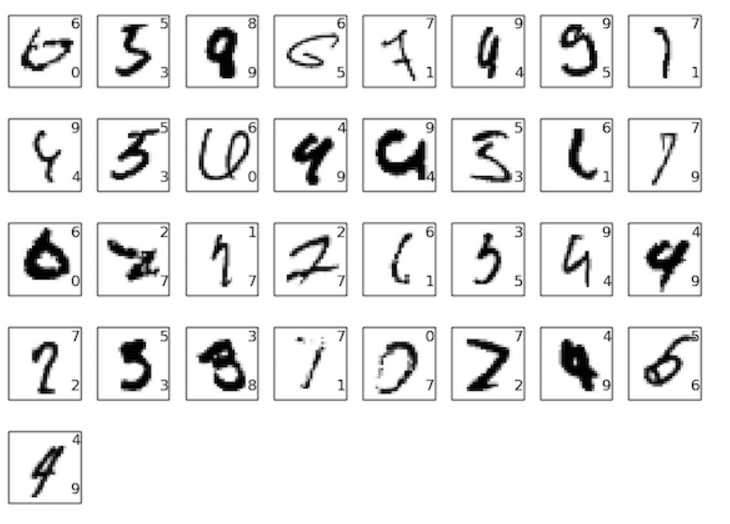

In [44]:
Image(filename='./img/numbers2.png') 

On remarque que beaucoup d’entre eux sont difficiles même pour un humain de classer. Beaucoup d'entre eux sont difficiles même pour un humain à classer. Considérons, par exemple, la troisième image dans la rangée supérieure. Pour nous, il ressemble plus à un «9» qu'à un «8», le réseau pense également que c'est un "9". Ce genre d '«erreur» est à tout le moins compréhensible, voire même louable.  

Dans le cadre d’un apprentissage supervisé, un exemple classique d’utilisation d’un RN est celui d’un système chargé de classer des images de chiffres manuscrits. Dans cet exemple les niveaux d’activations xi(1) des neurones i = 1,…,k de la couche d’entrée correspondent aux niveaux de gris des pixels de l’image, k étant le nombre de pixels des images. La couche de sortie est en l’occurrence constituée de neurones yj,j = 0,1,…,9 qui correspondent aux dix chiffres que l’on peut attribuer à chaque image d’un ensemble d’entraînement. Les niveaux d’activation des neurones sont déterminés récursivement, couche par couche.  

Dans les chapitres précédents, nous avons vu qu’il était enseigné à nos réseaux de neurones de faire un travail de reconnaissance des images de chiffres manuscrits.  

Cela a été réalisé en utilisant des réseaux dans lesquels les couches de réseau adjacentes sont entièrement connectées l'une à l'autre. Autrement dit, chaque neurone du réseau est connecté à chaque neurone des couches adjacentes :

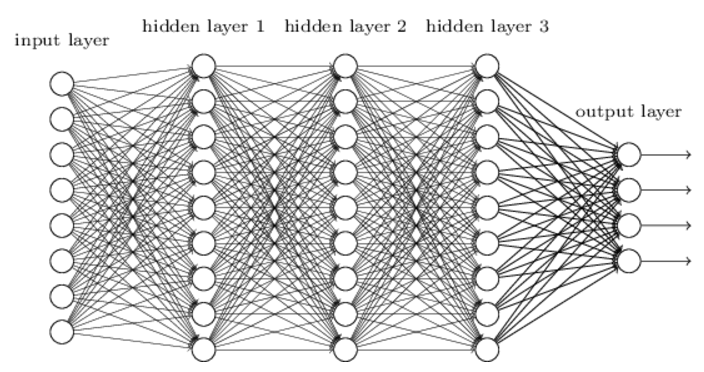

In [45]:
Image(filename='./img/nn3.png') 

Plus particulièrement, pour chaque pixel de l'image d'entrée, il a été codé : l'intensité du pixel comme valeur pour un neurone correspondant dans la couche d'entrée.
Pour les 28 x28 pixels images que nous utilisons, cela signifie que notre réseau a 784(= 28 × 28) neurones d'entrée. Il a été ensuite formé les poids et les biais du réseau afin que la sortie du réseau  identifie correctement l'image d'entrée: '0', '1', '2', ..., '8' ou '9'.  

Le fait que toute les couches soient connectées pour classer les images n’est pas la solution la plus optimale, par exemple il traite les pixels d’entrées qui sont éloignés les uns des autres et proches les uns des autres.
Les réseaux de neurones à convolution incorporent des contraintes et réalisent un certain degré d'invariance de décalage et de déformation en utilisant trois idées : zones réceptives locales, poids partagés, et sous-prélèvement spatial. L'utilisation des poids partagés réduit le nombre de paramètres dans le système facilitant la généralisation.  
	
Le principe de convolution impose une contrainte de partage des poids. Le comportement présumé du cerveau humain utilise ce concept de poids partagés. En effet dans le cerveau humain des neurones détectent certains traits dans de petites régions de la rétine, essentiellement de la même manière dans toutes ces régions. On a plusieurs neurones qui calculent la même fonction sur des entrées différentes.

**Les zones réceptives locales :** 


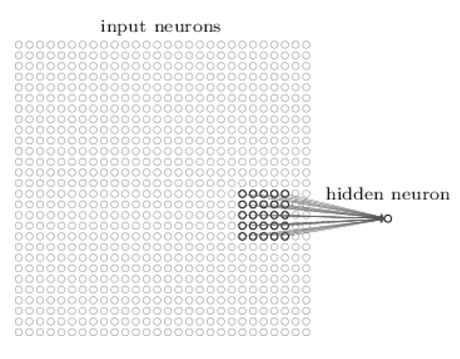

In [46]:
Image(filename='./img/nn5.png') 

Prenons l’exemple d’une région 5x5 correspondant à 25 pixels d’entrée, cette régions dans l’image d’entrée est appelée le champ réceptif local pour un neurone caché,  Chaque connexion apprend un poids. Et le neurone caché apprend un biais global.  

On glisse ensuite le champ réceptif local sur toute l'image d'entrée. Pour chaque champ réceptif local, il y a un neurone caché différent dans la première couche cachée. Pour illustrer cela concrètement, commençons par un champ réceptif local dans le coin supérieur gauche : 


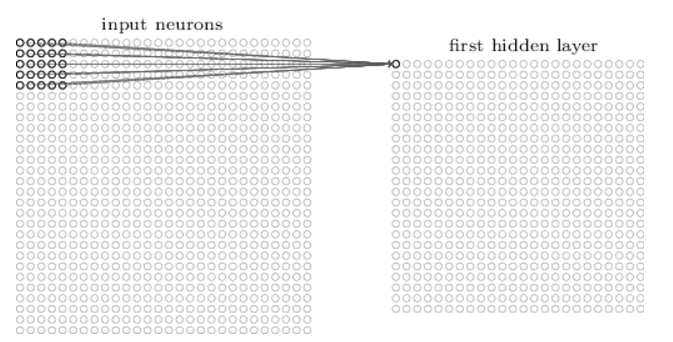

In [47]:
Image(filename='./img/nn6.png') 

Ensuite le champ réceptif local est glissé d’un pixel vers la droite afin de se connecter à un deuxième neurone caché et ainsi de suite. On peut bien entendu, déplacer le champ réceptif de 2 pixels vers la droite si nous avions fixé une longueur de pas de 2.

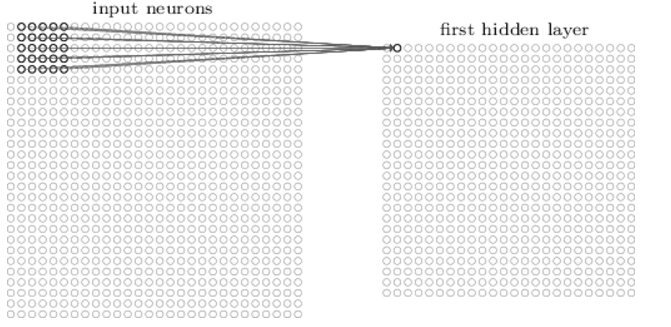

In [48]:
Image(filename='./img/nn7.png') 

**Poids partagés : **

Ici, tous les neurones de la première couche cachée détectent exactement la même fonction, juste à des emplacements différents dans l'image d'entrée. Pour voir pourquoi cela est logique, supposons que les poids et les biais sont tels que le neurone caché peut choisir, par exemple, un bord vertical dans un champ local réceptif particulier.  

Cette capacité est également susceptible d'être utile à d'autres endroits de l'image. Il est donc utile d'appliquer le même détecteur de caractéristiques partout dans l'image.   

Prenons un exemple : 


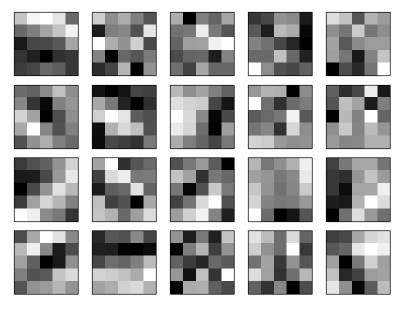

In [49]:
Image(filename='./img/nn8.png') 

Les 20 images correspondent à 20 fonctionnalités différentes. Chaque carte est représentée par une image de bloc 5 × 5, correspondant aux poids 5 × 5 dans le champ réceptif local.  
Les blocs plus blancs signifient un poids plus petit (typiquement, plus négatif), donc la carte de caractéristique répond moins aux pixels d'entrée correspondants. Les blocs plus foncés signifient un poids plus important, de sorte que la carte des caractéristiques répond davantage aux pixels d'entrée correspondants.  

L’avantage du partage de poids et des biais est qu’il réduit le nombre de paramètres impliqués dans un réseau convolutif.
Pour chaque carte de caractéristiques, nous avons besoin de 25 = 5 × 5 poids partagés, plus un seul biais partagé.   Ainsi, chaque mappe de caractéristique nécessite 26 paramètres. Si nous avons des cartes de caractéristique 20 qui est un total de 20 × 26 = 520 paramètres définissant la couche convolutionnelle.    

Par comparaison, supposons que nous avions une première couche totalement connectée, avec 784 = 28 × 28 neurones d'entrée, et un modeste 30 neurones cachés, Il s'agit d'un total de 784 × 30 poids, plus un 30 biais supplémentaires, pour un total de 23,550 paramètres.   

En d'autres termes, la couche totalement connectée aurait plus de 4040 fois autant de paramètres que la couche convolutionnelle.  

** Couche de pooling  : **

Les couches de pooling sont habituellement utilisées immédiatement après des couches convolutives. Ce que font les couches de pooling est de simplifier les informations dans la sortie de la couche convolutionnelle.  

En détail, une couche de pooling prend chaque carte de caractéristiques sortie de la couche convolutionnelle et prépare une carte condensée de caractéristiques.   
Par exemple, chaque unité dans la couche de mise en commun peut résumer une région de (par exemple) 2 x 2 neurones dans la couche précédente. À titre d'exemple concret, une procédure commune pour la mise en commun est appelée max-pooling.   

Il est possible d'utiliser d'autres fonctions de pooling que le maximum. On peut utiliser un "average pooling" (la sortie est la moyenne des valeurs du patch d'entrée), du "L2-norm pooling".  

Dans le max-pooling, une unité de mise en commun délivre simplement l'activation maximale dans la zone d'entrée 2 × 2, comme illustré dans le diagramme suivant : 


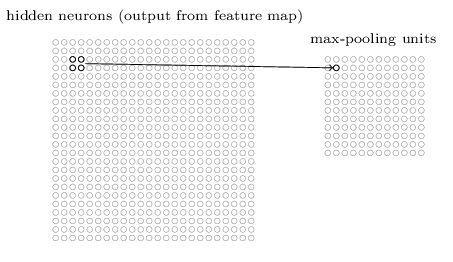

In [50]:
Image(filename='./img/nn9.png') 

La couche convolutionnelle implique habituellement plus d'une seule feature map. Nous appliquons max-pooling à chaque mappe de fonctionnalités séparément.  

S'il y avait trois feature maps, les couches convolutionnelles et max-pooling combinées ressembleraient à:


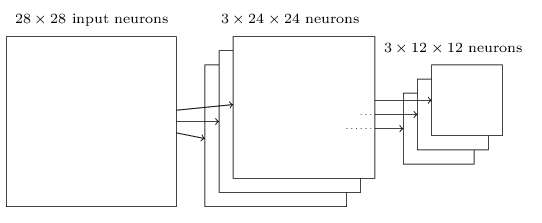

In [51]:
Image(filename='./img/nn10.png') 

Le Max-pooling peut être pensé comme un moyen pour le réseau de demander si une caractéristique donnée se trouve n'importe où dans une région de l'image. Une fois qu'une caractéristique a été trouvée, son emplacement exact n'est pas aussi important que son emplacement approximatif par rapport à d'autres fonctionnalités. Un grand avantage est qu'il y a beaucoup moins de fonctionnalités mises en commun, ce qui permet de réduire le nombre de paramètres nécessaires dans les couches ultérieures.  

Le pooling permet de gros gains en puissance de calcul. Cependant, en raison de la réduction agressive de la taille de la représentation (et donc de la perte d'information associée), la tendance actuelle est d'utiliser de petits filtres.  


Nous pouvons maintenant regrouper toutes ces idées pour former un réseau neuronal convolutif complet. Il est similaire à l'architecture que nous cherchions, mais a l'addition d'une couche de 10 neurones de sortie, correspondant aux 10 valeurs possibles pour les chiffres MNIST ('0', '1', '2', etc.):


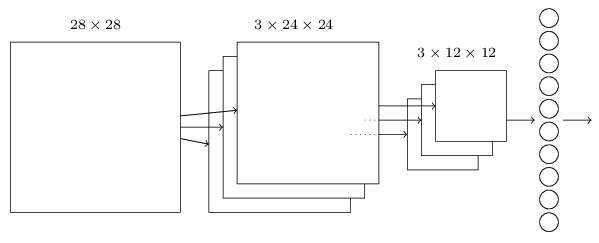

In [52]:
Image(filename='./img/nn11.png') 

Le réseau commence par 28 × 28 neurones d'entrée, qui sont utilisés pour coder les intensités de pixels pour l'image MNIST.   

Ceci est ensuite suivi par une couche convolutive utilisant un champ réceptif local de 5 × 5 et 3 feature maps. Le résultat est une couche de 3 × 24 × 24 neurones fonctionnalité cachée. L'étape suivante est une couche max-pooling, appliquée à 2 × 2  régions, à travers chacune des 3 feature maps. Le résultat est une couche de 3 × 12 × 12 neurones fonctionnalité cachée.



**Autre approche des réseaux de neurones :  **

Nous nous sommes concentrés sur un seul problème: classifier les chiffres MNIST. Ça nous a poussé à comprendre de nombreux algorithmes : la descente gradient stochastique, la rétropropagation, les réseaux convolutionnels, la régularisation et plus encore.  Si vous vous informez sur les réseaux neuronaux, vous rencontrerez de nombreuses idées que nous n'avons pas discutées: les réseaux neuronaux récurrents, les machines Boltzmann, les modèles génératifs, l'apprentissage par transfert, l'apprentissage par renforcement, etc.

**Recurrent neural networks (RNNs) :**

Les réseaux de neurones récurrents sont des systèmes dynamiques constitués d'unités (neurones) interconnectés interagissant non-linéairement, et où il existe au moins un cycle dans la structure. Les unités sont reliées par des arcs (synapses) qui possèdent un poids. La sortie d'un neurone est une combinaison non linéaire de ses entrées .
Une façon dont les RNN sont actuellement utilisés est de relier plus étroitement les réseaux neuronaux aux modes de pensée traditionnels sur les algorithmes, Un article de 2014 a développé un RNN qui pourrait prendre comme entrée une description caractère par caractère d'un (très, très simple!) Programme Python, et utiliser cette description pour prédire la sortie.

**Long short-term memory units (LSTMs):  **

Le problème du gradient instable est que le gradient devient de plus en plus petit à mesure qu'il se propage à travers des couches. Cela rend l'apprentissage  extrêmement lent, ce problème s'aggrave dans les RNN. Une unité LSTM est une unité de réseau récurrente qui  mémorise des valeurs pour des durées de temps longues ou courtes.
Les réseaux LSTM est très adapté pour classer, traiter et prédire une date chronologique, par exemple prédire l'affluence de passager d'un vol d'avion etc.


# Etude à partir d'une librairie python 

On va ici, pour aller plus loin utiliser une librairie Python permettant d'implémenter des réseaux de perceptrons. Il est assez facile de mettre en place un réseau de neuronnes avec la bibliothèque Scikit-Learn. Il est implémenté de nombreux algorithmes utilisés pour le machine learning ainsi que pour le nettoyage des données ou l'extraction de variables. 
Il existe notamment une implémentation des réseaux de perceptrons MLP([Multi-Layer Perceptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)). Deux implémentations ont été mise en place. Une pour la classification et l'autre pour la régression MLPClassifier et MLPRegressor. Dans notre cas nous allons utiliser l'implémentation permettant de classifier car nous voulons déterminer le chiffre représenté par une écriture manuscrite.

On peut très rapidement rappeler les différents avantages et inconvéniant de ces réseaux de plusieurs couches de perceptrons. 

#### The advantages of Multi-layer Perceptron are:
- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

#### The disadvantages of Multi-layer Perceptron (MLP) include:
    
- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

On représentera cette écriture par une image qui sera elle même représentée par une matrice de pixels. Les images sont toutes de la même taille 28x28 pixels, soit 784 pixels. Nous aurons donc 784 variables représentant la couleur du pixel 1 noir, 0 blanc. 

Nous avons utilisé les données proposées par Kaggle dans le cadre de leur [compétition](https://www.kaggle.com/c/digit-recognizer) . Ils mettent à disposition deux fichiers d'entrainement et de test pour réaliser de la classification sur les écritures manuscrites.

## Etudes des données 

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
from collections import Counter

In [54]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [55]:
train.shape

(42000, 785)

On a donc 42 000 exemples de chiffres et 784 pixels + 1 colonne représentant le label

In [56]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

Dans un premier temps on peut afficher quelques chiffres pour comprendre les données...

In [58]:
def get_matrix_image_random(df):
    return np.array(df.sample(1).drop(["label"], axis=1)).reshape(28,28)

In [59]:
fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
fig.set_size_inches(10,10)
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(get_matrix_image_random(train), cmap='gray')
ax2 = fig.add_subplot(gs[0,-1])
ax2.imshow(get_matrix_image_random(train), cmap='gray')
ax3 = fig.add_subplot(gs[0,-2])
ax3.imshow(get_matrix_image_random(train), cmap='gray')
ax4 = fig.add_subplot(gs[-1,0])
ax4.imshow(get_matrix_image_random(train), cmap='gray')
ax5 = fig.add_subplot(gs[-1,-1])
ax5.imshow(get_matrix_image_random(train), cmap='gray')
ax6 = fig.add_subplot(gs[-1,-2])
ax6.imshow(get_matrix_image_random(train), cmap='gray')
ax7 = fig.add_subplot(gs[-2,0])
ax7.imshow(get_matrix_image_random(train), cmap='gray')
ax8 = fig.add_subplot(gs[-2,-1])
ax8.imshow(get_matrix_image_random(train), cmap='gray')
ax9 = fig.add_subplot(gs[-2,-2])
ax9.imshow(get_matrix_image_random(train), cmap='gray')

On peut ensuite commencer à créer un réseau de neuronnes très simple. Il comportera 5 couches de 2 perceptrons. On peut très facilement modifier les paramètres de ces réseaux de neuronnes. Il faut quand même faire attention  à la complexité des algorithmes. En effet, l'implémentation proposée par scikit learn utilise uniquement de la mémoire RAM ce qui peut être très vite assez limité. D'autres implémentations plus performantes utilsent la GPU pour effectuer des prédictions sur des ensembles de données plus importants. 

In [60]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2),random_state=1)

clf.fit(X, y)  
clf.predict([[2., 2.], [-1., -2.]])

C:\Users\rcour\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


array([1, 0])

In [61]:
X = train.drop("label" , axis = 1)
y = train.label

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
clf = MLPClassifier(random_state=1)

In [64]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [65]:
predict = clf.predict(X_test)

In [66]:
Counter(predict)

Counter({0: 1032,
         1: 1179,
         2: 1083,
         3: 1002,
         4: 1119,
         5: 925,
         6: 1026,
         7: 1154,
         8: 995,
         9: 985})

## Performances sur l'ensemble de test

In [67]:
from sklearn.metrics import classification_report
print(classification_report(predict, y_test))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1032
          1       0.98      0.97      0.98      1179
          2       0.96      0.95      0.96      1083
          3       0.94      0.96      0.95      1002
          4       0.97      0.88      0.92      1119
          5       0.93      0.95      0.94       925
          6       0.97      0.97      0.97      1026
          7       0.95      0.96      0.96      1154
          8       0.93      0.95      0.94       995
          9       0.87      0.92      0.90       985

avg / total       0.95      0.95      0.95     10500



## Performances sur l'ensemble d'apprentissage

In [68]:
print(classification_report(clf.predict(X_train), y_train))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3072
          1       1.00      0.99      0.99      3537
          2       0.99      0.99      0.99      3119
          3       0.98      0.99      0.99      3292
          4       1.00      0.92      0.96      3313
          5       0.99      0.99      0.99      2833
          6       1.00      0.99      0.99      3123
          7       0.98      0.99      0.99      3197
          8       0.99      0.99      0.99      3049
          9       0.93      0.98      0.95      2965

avg / total       0.98      0.98      0.98     31500



In [69]:
from pylab import imshow, rand

In [70]:
X_plot = X_test.copy()

X_plot["label"] = y_test
X_plot["predict"] = predict

In [72]:
X_error = X_plot[X_plot.label != X_plot.predict]

In [73]:
X_error.shape[0]/X_plot.shape[0]

0.050666666666666665

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")

In [75]:
len(X_error.label.value_counts())

10

On peut essayer d'afficher quels sont les chiffres les mieux ou les moins bien classifié avec un histogram représentant le taux de bonne classification. Comme les différentes classes sont assez équitablement réparties on peut se permettre de ne pas normaliser les données pour conserver une compréhension du nombre de mauvaise classification.

(0, 9)

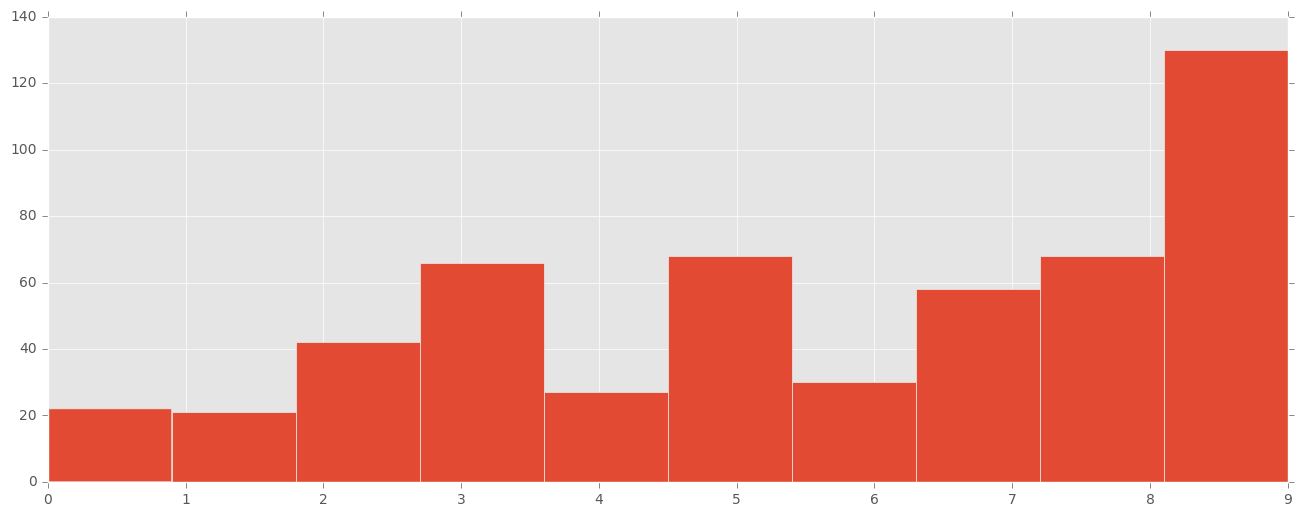

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(16,6)
ax.hist(X_error.label)
ax.set_xlim(0, 9)

On peut voir ici que les 0 et 1 et les 6 sont très bien classifiés dans l'ensemble. Il y a plus de problèmes sur les autres classes. 

In [77]:
from random import randint

In [78]:
n_elemtn = X_error.shape[0]
n_elemtn

532

On peut ensuite essayer de comprendre quels sont les chiffres prédits par rapport à l'image. Il est plus ou moins évident de comprendre "pourquoi" il a pu se tromper.

In [1]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print("La valeur prédite est " + str(X_error.iloc[int_to_plot]["predict"]))

NameError: name 'randint' is not defined

3


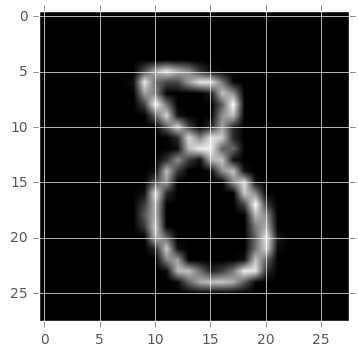

In [80]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print("La valeur prédite est " + str(X_error.iloc[int_to_plot]["predict"]))

9


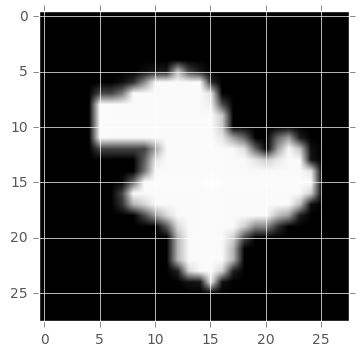

In [81]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print("La valeur prédite est " + str(X_error.iloc[int_to_plot]["predict"]))

4


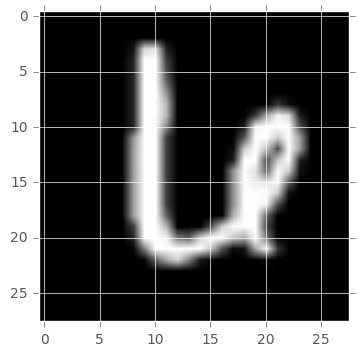

In [82]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print("La valeur prédite est " + str(X_error.iloc[int_to_plot]["predict"]))

In [83]:
X_error["val_combination"] = X_error.label.apply(str) + "," +  X_error.predict.apply(str)

C:\Users\rcour\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [84]:
matrix = np.zeros((10,10))

In [85]:
values = X_error["val_combination"].value_counts()
for ind in values.index:
    i = int(ind.split(",")[0])
    j = int(ind.split(",")[1])
    matrix[i][j] = values[ind]
    

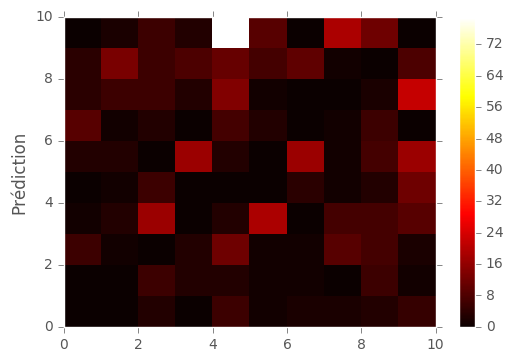

In [86]:
#plt.imshow(matrix, cmap='hot', interpolation='nearest')
heatmap = plt.pcolor(matrix, cmap="hot")
plt.colorbar(heatmap)
plt.ylabel("Label")
plt.ylabel("Prédiction")
plt.show()

On voit ici que les 3 sont souvent associés a des 5 et des 2 et que les 9 sont souvent associés a des 4 et des 8. Nous avons aussi les 

In [87]:
X_error["val_combination"].value_counts(dropna=False)[0:5]

9,4    79
7,9    22
3,5    19
9,7    19
5,3    17
Name: val_combination, dtype: int64

On voit ici les plus mauvaises classifications triées par ordre décroissant. 

## Test en mélangeant les labels permettant l'apprentissage

In [88]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [89]:
clf = MLPClassifier(random_state=1)

In [90]:
import random

In [91]:
y_train_shuffled = y_train.values.copy()
np.random.shuffle(y_train_shuffled)

In [92]:
clf.fit(X_train,y_train_shuffled)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [93]:
predict = clf.predict(X_test)

In [94]:
from collections import Counter
Counter(predict)

Counter({0: 4,
         1: 10326,
         2: 19,
         3: 23,
         4: 26,
         5: 8,
         6: 17,
         7: 31,
         8: 12,
         9: 34})

## Performances sur l'ensemble de test

In [95]:
from sklearn.metrics import classification_report
print(classification_report(predict, y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.97      0.11      0.20     10326
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00        23
          4       0.00      0.08      0.00        26
          5       0.00      0.12      0.00         8
          6       0.00      0.12      0.00        17
          7       0.00      0.06      0.00        31
          8       0.00      0.00      0.00        12
          9       0.00      0.06      0.00        34

avg / total       0.96      0.11      0.19     10500



## Performances sur l'ensemble d'apprentissage

In [96]:
print(classification_report(clf.predict(X_train), y_train))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.99      0.11      0.20     31166
          2       0.00      0.00      0.00        25
          3       0.00      0.10      0.00        59
          4       0.00      0.13      0.00        46
          5       0.00      0.12      0.00        17
          6       0.00      0.25      0.00        12
          7       0.00      0.05      0.00        60
          8       0.00      0.00      0.00        33
          9       0.00      0.00      0.00        71

avg / total       0.98      0.11      0.20     31500



# Vulgarisation

Le réseau de neurones traditionnel nous permet de traduire 10,000 chiffres manuscrits en chiffres reconnus. Au début, le réseau de neurones traduit les chiffes en pixel avec une valeur « 0 » pour les pixels noirs et « 1 » pour les pixels blancs. Chaque pixel dans une image représentera une variable.  

Sur un test de 1000 images manuscrites, le modèle a identifié 922 parmi elle, donc avec une précision de 92.2%. Ci-dessous une table de contingence pour observer les résultats :  


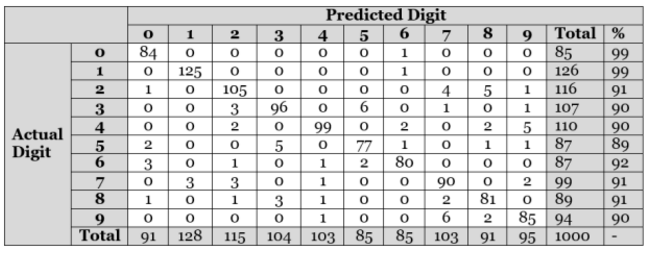

In [97]:
from IPython.display import Image
Image(filename='./img/table.png') 

Cette table de contingence montre la performance du modèle ANN (Artificial Neural Network). Par exemple, la première ligne identifie le chiffre 0 correctement presque tout le temps (84/85 avec une confusion avec le chiffre 6).  

D’après la table, on remarque que les chiffres « 0 » et « 1 » sont identifiés correctement assez fréquemment. Par contre, le chiffre « 5 » est moins évident à identifier. En plus, la table de contingence nous montre que le chiffre 2 est confondu avec les chiffes 7 et 8 à peu près 8% du temps.


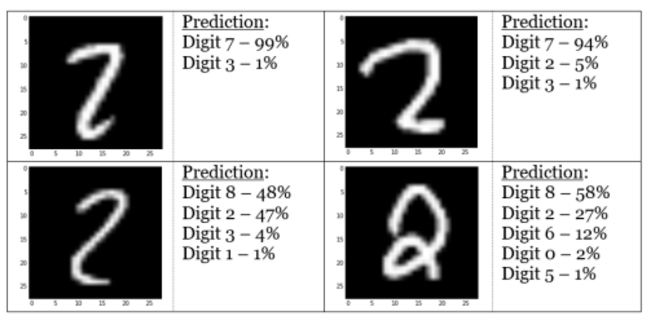

In [98]:
Image(filename='./img/digit1.png') 

Alors que les images peuvent sembler évidentes comme le chiffre « 2 » pour un humain, le réseau de neurones a du mal à reconnaître des aspects d’images comme la « queue » du chiffre 2.
Les chiffres « 3 » et « 5 » sont confondus 10% du temps également


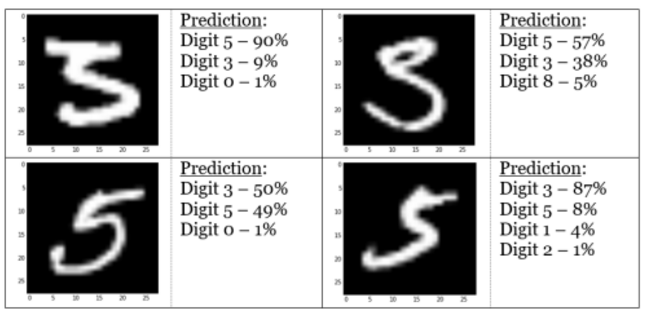

In [99]:
Image(filename='./img/digit2.png') 

## Les neurones qui ont inspiré le réseau

Notre cerveau est un grand réseau de neurones liés, qui permettent la transmission de l’information d’un point A à un point B. Quand différentes informations sont énvoyées du point A au point B, différents neurones sont activés et donc le cerveau utilise différentes routes pour passer de A à B.

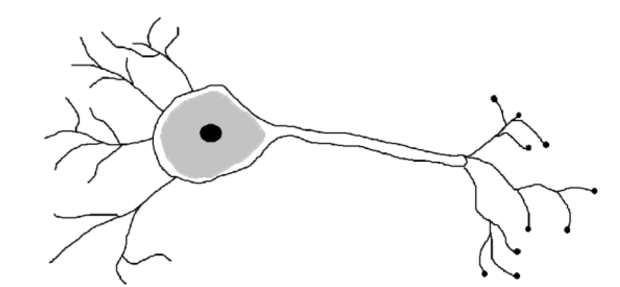

In [100]:
Image(filename='./img/neuron.png') 

Dns chaque neurone, les dendrites reçoivent les signaux émis par d’autres neurones. Su un neurone reçoit un niveau élevé de signaux d’un intervalle de temps, le neurone envoie une impulsion électrique vers les terminaux. Ces signaux sont donc reçus par d’autres neurones.

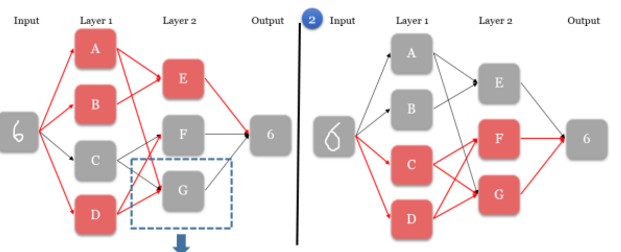

In [101]:
Image(filename='./img/nn1.png') 

1.	Quand le nœud d’entrée prend une image, il active uniquement une série de neurones, qui lance une chaîne de réaction pour créer un chemin unique pour le nœud de sortie. Dans le premier scénario, les neurones A, B, et D sont activés à la première couche.

2.	Les neurones activés envoient des signaux à chaque neurone dans la prochaine couche. Ceci affecte directement les neurones de la prochaine couche. Dans le premier scénario, le neurone A envoie un signal à E et G, le neurone B à E, et le neurone D à F et G.

3.	Dans la prochaine couche, chaque neurone établit des règles de combinaisons de signaux reçus qui activent un neurone. Dans le premier scénario, le neurone E est activé par les signaux A et B. Par contre, pour les neurones F et G, leurs règles leur dit qu’ils n’ont pas reçu les bons signaux à être activés, et donc ils restent gris.

4.	Les étapes 2 et 3 sont répétés pour toutes les autres couches, jusqu’à ce qu’on se retrouve uniquement avec le nœud de sortie.

5.	Le nœud de sortie déduit le bon chiffre basé sur les signaux de la couche précédente. Chaque combinaison de neurones activés dans cette couche mène à une solution, même si la combinaison est différente. Dans les scénarios 1 et 2, deux images différentes sont fournis, et donc deux chemins différents sont suivi, et le bon chiffre « 6 » est quand même reconnu dans les 2 cas.

Au début, il faut définir le nombre de couches ainsi que le nombre de neurones pour chaque couche de notre réseau. Il n’y a pas forcément de limite, mais 3 couches semble un bon départ vu que c’est proportionnel au nombre de variables. On utilise 3 couches avec 500 neurones pour chacune. On note deux facteurs clé :
- Une métrique pour évaluer la précision du modèle -> MSE (qu’on va chercher à minimiser)
- Des règles pour définir si un neurone est activé ou non.
    - Les poids des signaux rentrants
    - Le minimum du signal reçu dont le réseau a besoin pour l’activation

Dans l’exemple suivant, les règles pour le neurone G
- Le poids pour les signaux A et B est nul (aucune connexion)
- C, D, et E ont des poids de 1, 2, et -1 respectivement. 

La valeur minimale pour G est 2, donc G est activé si :
- D est activé et E ne l’est pas OU
- C et D sont activés


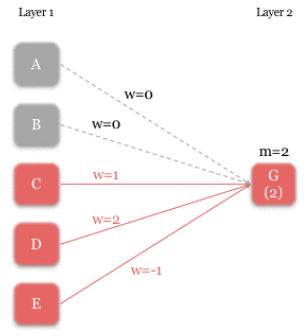

In [102]:
Image(filename='./img/nn21.png') 

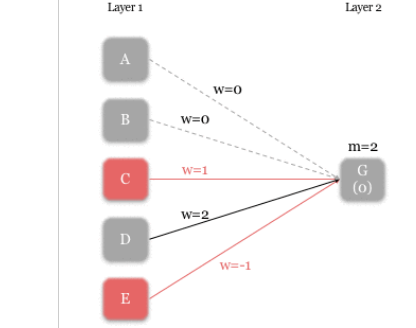

In [103]:
Image(filename='./img/nn22.png') 

## Limites/raisons qui nous poussent vers des réseaux  convolutionnels et le Deep Learning

Entraîner un réseau de neurone consomme beaucoup de temps et de CPU par rapport à d’autres types de modèles comme les forêts aléatoires, par exemple. En plus, la performance n’est pas forcément supérieure.
Le réseau de neurone décrit au-dessus est la base de modèle plus avancés comme les DNN (Deep Neural Network).
Ce modèle n’arrive pas à reconnaître les images si celles si sont légèrement déformés, ou subissent des translations. On a donc une amélioration de ce réseau, avec les CNN (Convolutional Neural Networks) qui résout ce type de problèmes en analysant différents régions d’une image.

## Important

A noter que durant cette démonstration, la méthode d’activation utilisé s’apelle la fonction d’activation. Elle renvoie 0 si l’entrée est faible et renvoie un résultat positif si l’entrée est suffisamment puissante. Dans la démonstration Python qui va suivre, la fonction qui va activer sera une fonction sigmoïde. Le nœud de sortie sera aussi influencé une fonction, et une généralisation de la fonction logistique. C’est d’ailleurs pourquoi on utilise la différenciation pour trouver les poids corrects grâce à la descente du gradient.


## Technique d’améliorations
### Distorsion
Un réseau de neurones apprend à reconnaitre les chiffres manuscrits quand on en plus dans notre base train. Ainsi, une large training dataset avec des images labélisées est important. Une manière pour augmenter la taille est de créer plus de données. En appliquant différents distorsions aux images existantes, chaque image altérée pourra être traitée comme un nouvel exemple de training.


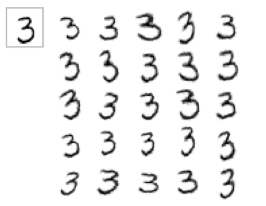

In [ ]:
Image(filename='./img/digit3.png') 

Simulation comportement humain.  

On peut appliquer des rotations pour simuler l’angle avec lequel les personnes écrivent. On peut également étirer et serrer à un certain point pour simuler des oscillations non-contrôlées de muscles

### Technique mini-batch gradient de décente  
On utilise la décente de gradient pour influencer l’activation des neurones est améliorer la précision globale. Le réseau de neurones balaye chaque exemple d’entraînement pour déterminer la meilleure disposition des règles. Même si une dataset plus grand améliore la prédiction, elle augmente aussi le temps pour traiter les données. Une solution plus efficace existe, prendre un échantillon à chaque foi pour approximer le meilleure changement de règle.


In [ ]:
!jupyter nbconvert --to pdf "./Hand Written Digits Recognition.ipynb"